In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

In [23]:
df = pd.read_csv('Heart.csv', names = ['age', 'sex', 
                                       'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 
                                       'slope', 'ca', 'thal', 'result'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,result
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [24]:
df.replace('?', np.nan, inplace = True)
df.dropna(inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null float64
sex         297 non-null float64
cp          297 non-null float64
trestbps    297 non-null float64
chol        297 non-null float64
fbs         297 non-null float64
restecg     297 non-null float64
thalach     297 non-null float64
exang       297 non-null float64
oldpeak     297 non-null float64
slope       297 non-null float64
ca          297 non-null object
thal        297 non-null object
result      297 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [ ]:
#converting to binary class classification

In [28]:
df['result'].replace([0, 1, 2, 3, 4], [0, 1, 1, 1, 1], inplace = True)
df['ca'].replace(['0.0', '1.0', '2.0', '3.0'], [0.0, 1.0, 2.0, 3.0], inplace = True)
df['thal'].replace(['6.0', '3.0', '7.0'], [6.0, 3.0, 7.0], inplace = True)

In [29]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,result
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


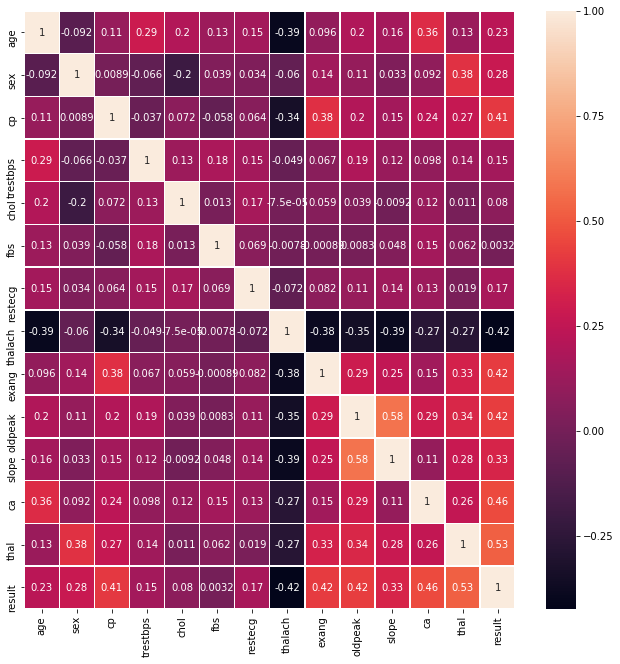

In [30]:
#Heat_Map
fig,ax = plt.subplots(figsize = (11, 11))
sns.heatmap(df[df.columns].corr(), annot=True, linewidths=.5, ax=ax)

In [31]:
#Creating X and Y
X = df[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['result']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic_Regression

In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#y_pred = y_pred.reshape(-1, 1)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of Logistic regression classifier on training set: 0.85
Accuracy of Logistic regression classifier on test set: 0.86
0.8555555555555555
[[45  3]
 [10 32]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        48
           1       0.91      0.76      0.83        42

   micro avg       0.86      0.86      0.86        90
   macro avg       0.87      0.85      0.85        90
weighted avg       0.86      0.86      0.85        90



C:\Users\Vidhubala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Decision_Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}' .format(clf.score(X_test, y_test)))
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.76
0.7555555555555555
[[40  8]
 [14 28]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        48
           1       0.78      0.67      0.72        42

   micro avg       0.76      0.76      0.76        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.76      0.76      0.75        90



In [53]:
D_result=pd.DataFrame({'models':['DecisionTree'],'accuracy':[clf.score(X_test, y_test)],'True Negative':[38],'True Positive':[10],'False Positive':[12],'False Negative':[10]})
D_result

,models,accuracy,True Negative,True Positive,False Positive,False Negative
0,DecisionTree,0.755556,38,10,12,10


# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.84
0.8444444444444444
[[45  3]
 [11 31]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87        48
           1       0.91      0.74      0.82        42

   micro avg       0.84      0.84      0.84        90
   macro avg       0.86      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



In [54]:
KNN_result=pd.DataFrame({'models':['KNN'],'accuracy':[knn.score(X_test, y_test)],'True Negative':[45],'True Positive':[31],'False Positive':[11],'False Negative':[3]})
KNN_result

,models,accuracy,True Negative,True Positive,False Positive,False Negative
0,KNN,0.844444,45,31,11,3


# Linear_Discriminant_Analysis

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(X_test, y_test)))
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of LDA classifier on training set: 0.85
Accuracy of LDA classifier on test set: 0.87
0.8666666666666667
[[45  3]
 [ 9 33]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        48
           1       0.92      0.79      0.85        42

   micro avg       0.87      0.87      0.87        90
   macro avg       0.88      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



In [40]:
LDA_result=pd.DataFrame({'models':['LDA'],'accuracy':[lda.score(X_test, y_test)],'True Negative':[45],'True Positive':[33],'False Positive':[9],'False Negative':[3]})
LDA_result

,models,accuracy,True Negative,True Positive,False Positive,False Negative
0,LDA,0.866667,45,33,9,3


# Gaussian Naive_Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of GNB classifier on training set: 0.84
Accuracy of GNB classifier on test set: 0.84
0.8444444444444444
[[44  4]
 [10 32]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        48
           1       0.89      0.76      0.82        42

   micro avg       0.84      0.84      0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



In [42]:
NB_result=pd.DataFrame({'models':['Naive Bayes'],'accuracy':[accuracy_score(y_test, y_pred)],'True Negative':[44],'True Positive':[32],'False Positive':[10],'False Negative':[4]})
NB_result

,models,accuracy,True Negative,True Positive,False Positive,False Negative
0,Naive Bayes,0.844444,44,32,10,4


# Bernoulli Naive Bayes

In [43]:
from sklearn.naive_bayes import BernoulliNB

optimal_alpha = 1
NB_optimal = BernoulliNB(alpha = optimal_alpha)

# fitting the model
NB_optimal.fit(X_train, y_train)
y_pred = NB_optimal.predict(X_test)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(NB_optimal.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(NB_optimal.score(X_test, y_test)))
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of GNB classifier on training set: 0.80
Accuracy of GNB classifier on test set: 0.82
0.8222222222222222
[[45  3]
 [13 29]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        48
           1       0.91      0.69      0.78        42

   micro avg       0.82      0.82      0.82        90
   macro avg       0.84      0.81      0.82        90
weighted avg       0.84      0.82      0.82        90



# SVM

In [44]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of SVM classifier on training set: 0.86
Accuracy of SVM classifier on test set: 0.87
0.8666666666666667
[[46  2]
 [10 32]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        48
           1       0.94      0.76      0.84        42

   micro avg       0.87      0.87      0.87        90
   macro avg       0.88      0.86      0.86        90
weighted avg       0.88      0.87      0.86        90



C:\Users\Vidhubala\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [45]:
SVM_result=pd.DataFrame({'models':['SVM'],'accuracy':[accuracy_score(y_test, y_pred)],'True Negative':[46],'True Positive':[32],'False Positive':[10],'False Negative':[2]})
SVM_result

,models,accuracy,True Negative,True Positive,False Positive,False Negative
0,SVM,0.866667,46,32,10,2


In [46]:
result=pd.DataFrame({'models':['LogisticRegression'],'accuracy':[accuracy_score(y_test,Ypred1)],'True Negative':[45],'True Positive':[32],'False Positive':[10],'False Negative':[3]})
result

,models,accuracy,True Negative,True Positive,False Positive,False Negative
0,LogisticRegression,0.855556,45,32,10,3


In [47]:
Results=pd.concat([result,D_result])
Results

,models,accuracy,True Negative,True Positive,False Positive,False Negative
0,LogisticRegression,0.855556,45,32,10,3
0,DecisionTree,0.755556,38,10,12,10


In [55]:
result1=pd.concat([Results,NB_result,KNN_result,LDA_result,SVM_result])

In [56]:
result1

,models,accuracy,True Negative,True Positive,False Positive,False Negative
0,LogisticRegression,0.855556,45,32,10,3
0,DecisionTree,0.755556,38,10,12,10
0,Naive Bayes,0.844444,44,32,10,4
0,KNN,0.844444,45,31,11,3
0,LDA,0.866667,45,33,9,3
0,SVM,0.866667,46,32,10,2
